In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Data
data = pd.read_csv( "/content/London_HousePrices.csv" )
data.head()

,price,numberrooms,TotalFloorArea,CURRENT_ENERGY_EFFICIENCY,year
0,367000.0,2,49.85,76,2013
1,400000.0,3,69.00,80,2013
2,350000.0,1,30.00,62,2013
3,440000.0,1,41.00,68,2013
4,363000.0,1,41.00,69,2013


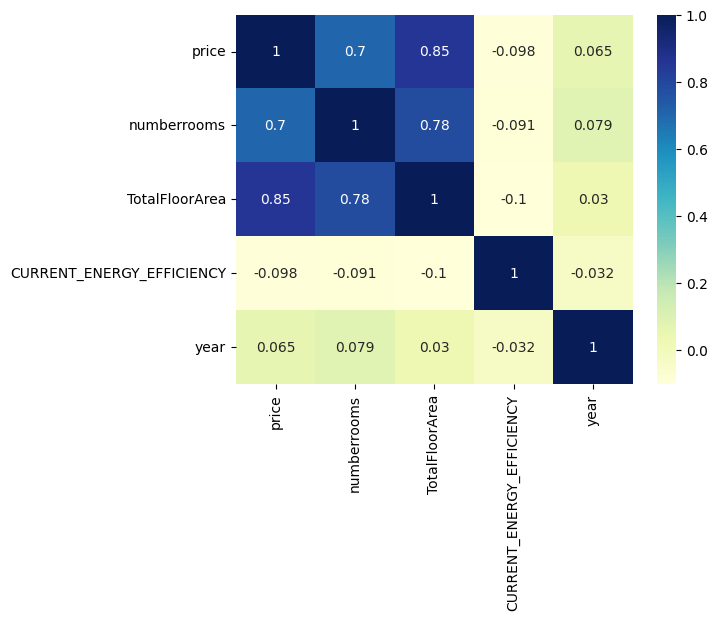

In [3]:
#Importing seaborn library for visualizations
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

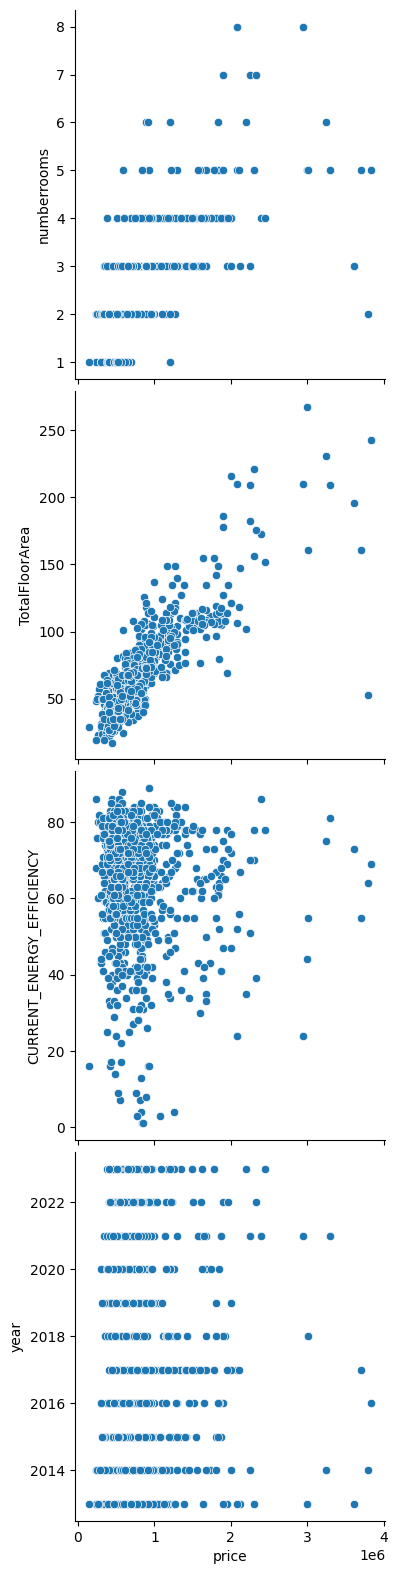

In [7]:
sns.pairplot(data, x_vars=['price'], y_vars=['numberrooms', 'TotalFloorArea', 'CURRENT_ENERGY_EFFICIENCY', 'year'], height=4, aspect=1, kind='scatter')
plt.show()

In [79]:
#Setting the dependent and the 1st independent variable
X = data[ 'price' ]
y1 = data[['TotalFloorArea']]


In [80]:
#Setting test size as 30 and training as 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [81]:
#Exploring the train/test data size
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(781,)
(336,)
(781, 1)
(336, 1)


In [82]:
#importing statmodels library to perform linear regression
import statsmodels.api as sm

In [83]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [84]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params


const    20.274571
price     0.000057
dtype: float64

In [85]:
#Performing a summary operation lists out all different parameters of the regression

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:         TotalFloorArea   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 03 May 2024   Prob (F-statistic):          1.11e-209
Time:                        02:13:50   Log-Likelihood:                -3273.6
No. Observations:                 781   AIC:                             6551.
Df Residuals:                     779   BIC:                             6560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2746      1.169     17.340      0.0

In [86]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_s
y_pred = lr.predict(X_test_sm)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#RMSE value
print("RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred )))
#R-squared value
print( "R-squared: ",r2_score(y_test, y_pred))

RMSE:  13.879904902686851
R-squared:  0.7823895829563241


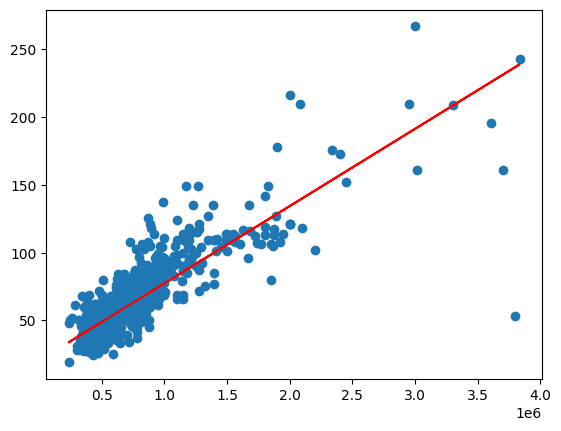

In [88]:
#Plot the results
plt.scatter(X_train, y_train)
plt.plot(X_train, 20.274571 + 0.000057*X_train, 'r')
plt.show()

In [94]:
#Setting the dependent and the 2nd independent variable
X = data[ 'price' ]
y2 = data['numberrooms']
#Setting test size as 30 and training as 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y2, train_size = 0.7, test_size = 0.3, random_state = 100)
#Exploring the train/test data size
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )
#importing statmodels library to perform linear regression
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


(781,)
(336,)
(781,)
(336,)


In [95]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params



const    1.213894
price    0.000002
dtype: float64

In [96]:
#Performing a summary operation lists out all different parameters of the regression
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            numberrooms   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     648.5
Date:                Fri, 03 May 2024   Prob (F-statistic):          1.50e-104
Time:                        02:16:59   Log-Likelihood:                -875.13
No. Observations:                 781   AIC:                             1754.
Df Residuals:                     779   BIC:                             1764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2139      0.054     22.386      0.0

In [93]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_s
y_pred = lr.predict(X_test_sm)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#RMSE value
print("RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred )))
#R-squared value
print( "R-squared: ",r2_score(y_test, y_pred))

RMSE:  0.6587193197486023
R-squared:  0.5679830646969593


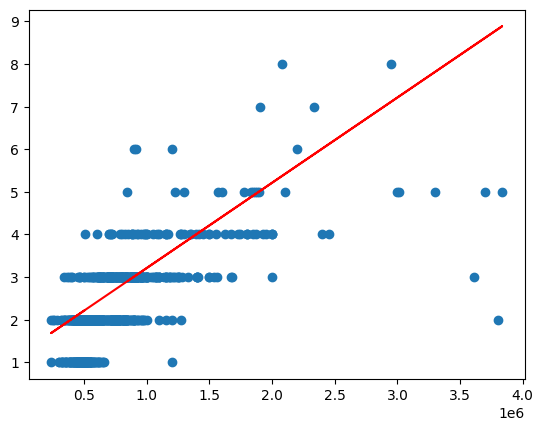

In [97]:
#Plot the results
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.213894 + 0.000002*X_train, 'r')
plt.show()

In [104]:
#Setting the dependent and 3rd independent variable
X = data[ 'price' ]
y3 = data['CURRENT_ENERGY_EFFICIENCY']
#Setting test size as 30 and training as 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y3, train_size = 0.7, test_size = 0.3, random_state = 100)
#Exploring the train/test data size
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )
#importing statmodels library to perform linear regression
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

(781,)
(336,)
(781,)
(336,)


In [105]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params


const    69.654072
price    -0.000004
dtype: float64

In [106]:
#Performing a summary operation lists out all different parameters of the regression
print(lr.summary())

                                OLS Regression Results                               
Dep. Variable:     CURRENT_ENERGY_EFFICIENCY   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     10.08
Date:                       Fri, 03 May 2024   Prob (F-statistic):            0.00156
Time:                               02:20:24   Log-Likelihood:                -3219.3
No. Observations:                        781   AIC:                             6443.
Df Residuals:                            779   BIC:                             6452.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [107]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_s
y_pred = lr.predict(X_test_sm)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#RMSE value
print("RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred )))
#R-squared value
print( "R-squared: ",r2_score(y_test, y_pred))

RMSE:  14.724027063086528
R-squared:  -0.0025648764176366967


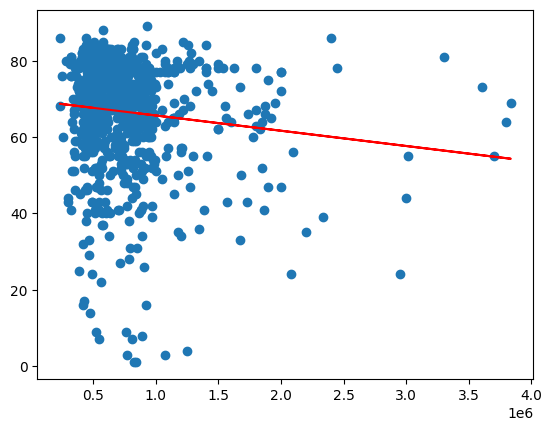

In [108]:
#Plot the results
plt.scatter(X_train, y_train)
plt.plot(X_train,  69.654072 +-0.000004 *X_train, 'r')
plt.show()